# Library 

ini adalah section yang berisi library yang diguunakan untuk preprocessing, analysis, buildmodel

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Data Understanding

In [4]:
df_train = pd.read_csv('../datasets/Road Traffic Accidents/RTA Dataset.csv')

In [5]:
df_train.duplicated().sum()

np.int64(0)

In [6]:
df_train.isna().sum().sum()

np.int64(20057)

ada sebanyak 20057 missing values cikkk banyak kali lah 

In [7]:
df_train.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [8]:
df_train['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

kelompok umur ya ini, hmm diapaim ya enaknya bisa sih buat kek muda, tua, usia lanjut atau lanngsung saja di encoding deh keknya dan unknown itu sebenernya missing values kan ya nanti bisa di imputasi sih

In [9]:
df_train['Driving_experience'].value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

ini juga unknown cikkkk, imputasi dulu trs encoding

In [10]:
df_train['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

ini mungkin nantinya bisa dikelompokkin lagi ya kek disatuin biar kategori nya nambah dikit trs imputasi juga

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df_train

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df_train['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

imputasi

In [ ]:
df_train['Owner_of_vehicle'].value_counts()

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

In [ ]:
df_train['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

mungkij nanti bisa di jadiin kategori yang lebih kecil ya kek misal kendaraan besar kecil or something nanti kita coba"

In [ ]:
df_train['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

tagetnya imbalance kocag

In [ ]:
df_train['Lanes_or_Medians'].value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

ini jalur nya kek mana ya trs imputasi juauga nanti

In [ ]:
df_train['Road_allignment'].value_counts()

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

mungkin nanti bisa di kategorinya lebih dikit lagi

In [ ]:
df_train.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df_train.isna().sum().sum()

np.int64(20057)

Penurunan jumlah kecelakaan dari 2023 ke 2024: 8.24%


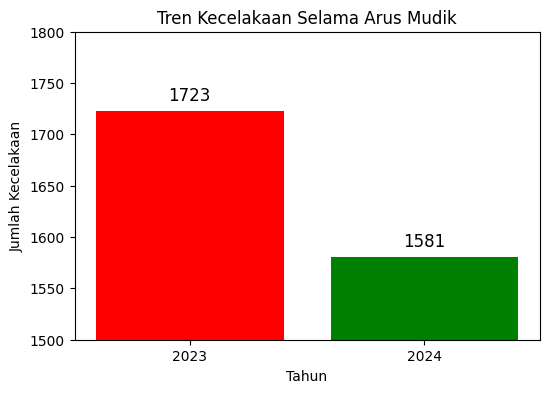

In [ ]:


data = {
    'Tahun': [2023, 2024],
    'Jumlah Kecelakaan': [1723, 1581]
}
df = pd.DataFrame(data)

penurunan_persen = ((df['Jumlah Kecelakaan'][0] - df['Jumlah Kecelakaan'][1]) / df['Jumlah Kecelakaan'][0]) * 100
print(f"Penurunan jumlah kecelakaan dari 2023 ke 2024: {penurunan_persen:.2f}%")

plt.figure(figsize=(6, 4))
plt.bar(df['Tahun'], df['Jumlah Kecelakaan'], color=['red', 'green'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kecelakaan')
plt.title('Tren Kecelakaan Selama Arus Mudik')
plt.xticks(df['Tahun'])
plt.ylim(1500, 1800)

for i, val in enumerate(df['Jumlah Kecelakaan']):
    plt.text(df['Tahun'][i], val + 10, str(val), ha='center', fontsize=12)

plt.show()


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

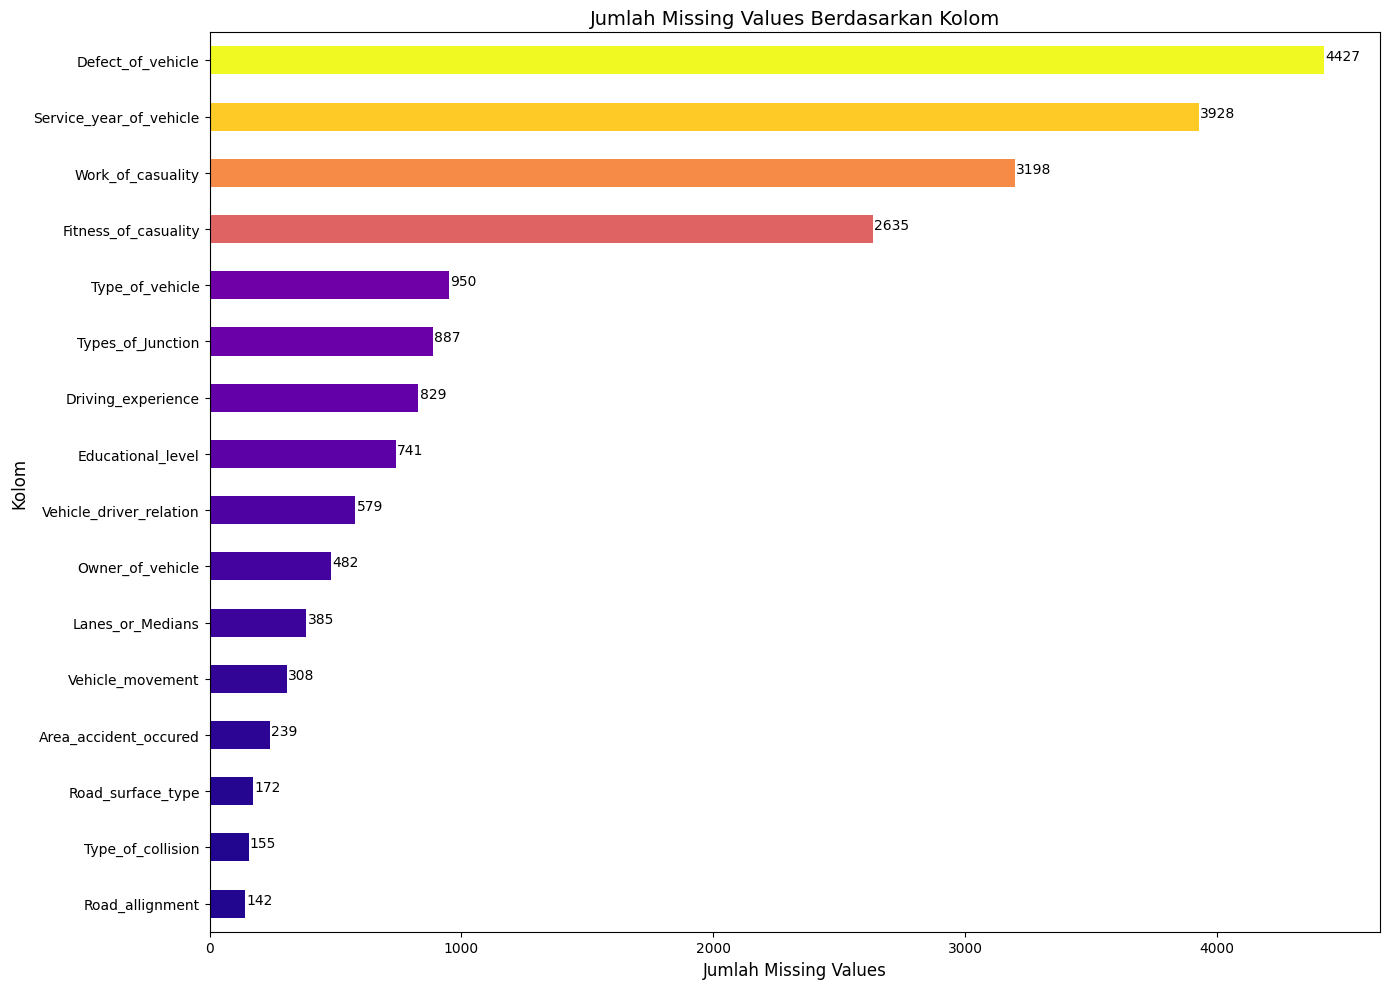

In [ ]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(14, 10))
bars = missing_values.plot(kind='barh', color=plt.cm.plasma(missing_values / max(missing_values)))
plt.title('Jumlah Missing Values Berdasarkan Kolom', fontsize=14)
plt.xlabel('Jumlah Missing Values', fontsize=12)
plt.ylabel('Kolom', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()

for i, v in enumerate(missing_values):
    bars.text(v + 5, i, str(v), ha='left', fontsize=10)

plt.tight_layout()
plt.show()


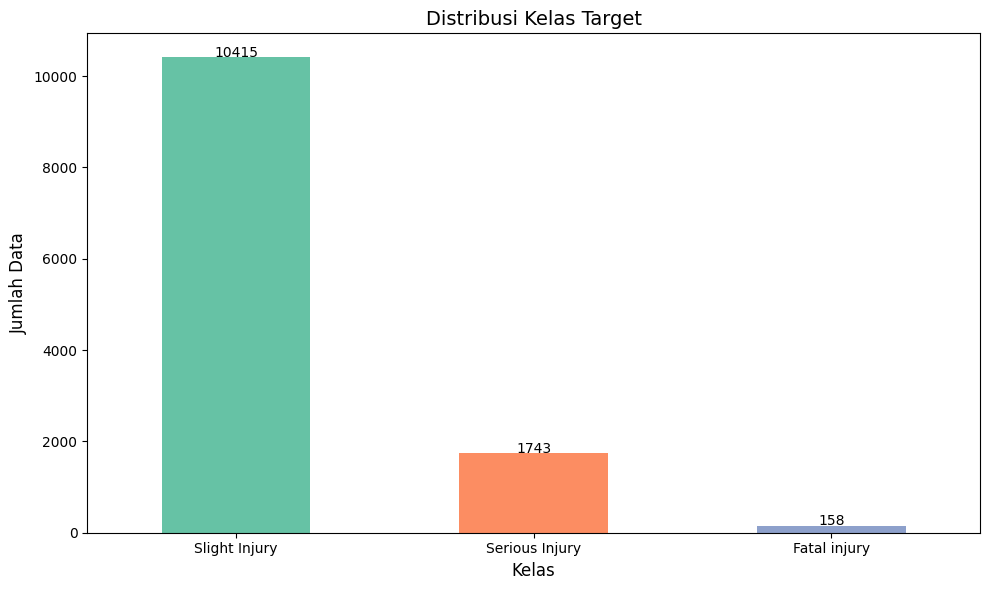

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df_train['Accident_severity'].value_counts()
colors = sns.color_palette("Set2", len(target_counts))

plt.figure(figsize=(10, 6))
bars = target_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Kelas Target', fontsize=14)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(target_counts):
    bars.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


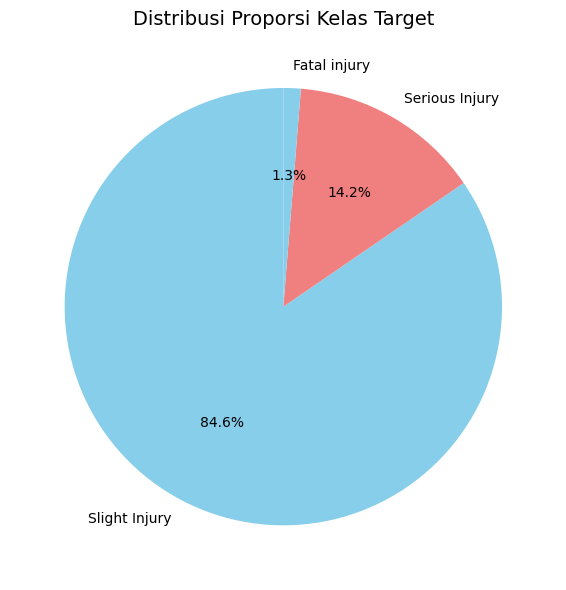

In [12]:
df_train['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

ternyata banyak kecelakaan yang melinatkan banyak kendaraann

In [13]:
df_train['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

korban nya harusnya banyak gak sih

In [14]:
df_train['Time'].value_counts()

Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
0:52:00       1
4:49:00       1
14:31:00      1
19:18:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64

bisa di buat katgorikal kayak pagi siang malam sore

In [15]:
df_train['Day_of_week'].value_counts()

Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64

its good 

In [16]:
df_train['Sex_of_driver'].value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

imputasi saja kawan pake modus keknya

In [17]:
df_train['Educational_level'].value_counts()

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

writing and reading + unknown

In [18]:
df_train['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

imputasi

In [20]:
df_train['Driving_experience'].value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

imputasi

In [22]:
df_train['Owner_of_vehicle'].value_counts()

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

good

In [23]:
df_train['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

imputasi atau ilangin

In [24]:
df_train['Defect_of_vehicle'].value_counts()

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64

hmmm analisis dulu kalo gak berguna buang aja dah 

In [25]:
df_train['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

bisa di trim and imputasi

In [28]:
df_train['Type_of_collision'].value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

imputasi

In [29]:
df_train['Road_surface_type'].value_counts()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

good

In [34]:
df_train['Light_conditions'].value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64

In [35]:
df_train['Weather_conditions'].value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

imputasi 

In [36]:
df_train['Type_of_collision'].value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

imputasi

In [37]:
df_train['Vehicle_movement'].value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [38]:
df_train['Casualty_class'].value_counts()

Casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

na ini apa yak mari pelajari

In [39]:
df_train['Sex_of_casualty'].value_counts()

Sex_of_casualty
Male      5253
na        4443
Female    2620
Name: count, dtype: int64

na juga

In [40]:
df_train['Age_band_of_casualty'].value_counts()

Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

na juga

In [42]:
df_train['Casualty_severity'].value_counts()

Casualty_severity
3     7076
na    4443
2      771
1       26
Name: count, dtype: int64

na juga

In [44]:
df_train['Work_of_casuality'].value_counts()

Work_of_casuality
Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: count, dtype: int64

imputasi

In [46]:
df_train['Work_of_casuality'].value_counts()

Work_of_casuality
Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: count, dtype: int64

imputasi

In [47]:
df_train['Fitness_of_casuality'].value_counts()

Fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64

nah kkan ini bahaya

In [48]:
df_train['Pedestrian_movement'].value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

ini yang paling gak jelas

In [49]:
df_train['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

bisa diolah kembali nanti yah

In [51]:
missing_counts = df_train.isnull().sum(axis=1)
top_missing_rows = missing_counts.sort_values(ascending=False).head(10)
top_missing_rows

2035    11
1191    11
1022    11
5       10
2058    10
2204    10
174     10
1702     9
1175     9
1961     9
dtype: int64

hmmmm

# PreProcessing

# Analysis

# BuildModel